In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import glob

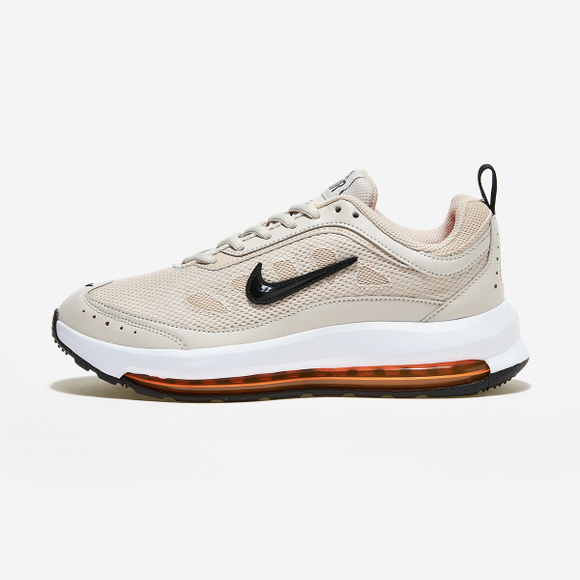

In [3]:
nike4 = Image.open("../ML_ImageData/nike4.jpg").convert("RGBA")
nike4

### PNG to JPG, Resize

(128, 128, 4)


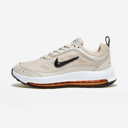

In [4]:
image = nike4.resize((128,128))
nike4 = Image.new("RGBA",image.size,"WHITE")
nike4.paste(image, mask=image)
nike4.convert("RGB").save("../DL_Project/nike4_jpg.jpg")
print(np.array(nike4).shape)
nike4

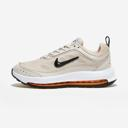

In [5]:
nike4 = Image.open("../DL_Project/nike4_jpg.jpg")
nike4

### 색 반전

(128, 128, 3)


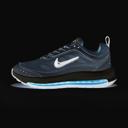

In [6]:
nike4_reversed = 255-(np.array(nike4))
img = Image.fromarray(nike4_reversed)
print(nike4_reversed.shape)
img

### 회전 데이터 추가

In [7]:
fileCount = 0
image_w = 128
image_h = 128

for angle in range(-30, 30, 1):
    # 회전 데이터 추가
    img_rotated = img.rotate(angle)
    img_rotated.save("../ML_ImageData/nike4_base/nike4_%03d.jpg"%(fileCount),"JPEG")
    fileCount += 1
    # 반전 데이터 추가
    # img_fliped = converse1.transpose(Image.FLIP_LEFT_RIGHT)
    # img_fliped.save("./Data/Converse_1/converse_1_%03d.jpg"%(fileCount),"JPEG")
    # fileCount += 1

### Vector 변환

In [8]:
width = 128
height = 128
count = 60
channel = 3

train = np.zeros(count*height*width*channel,dtype=np.int32).reshape(count,height,width,channel)
i = 0
for file in sorted(glob.glob("../ML_ImageData/nike4_base/*.jpg")):
    img = np.array(Image.open(file),dtype=np.int32)
    train[i,:,:,:] = img
    i+=1

In [9]:
train.shape

(60, 128, 128, 3)

### DF

In [10]:
train = train.reshape(-1,height*width*channel)
df = pd.DataFrame(train)
print(len(df))
df.head()

60


,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### DF Save & Load

In [13]:
df.to_csv("./Data/nike4.csv",index=False)

In [14]:
data = pd.read_csv("./Data/nike4.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
